In [1]:
import squidpy as sq
import scanpy as sc
import pandas as pd
import os
from train import train
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans

/home/ubuntu/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 处理DLPFC dataset

## 151507

In [2]:
section_list = ['151507', '151508', '151509', '151510', '151669', '151670', '151671', '151672', '151673', '151674', '151675', '151676']
section_id = section_list[0]

# 读取section_id这个slice的数据
adata = sc.read_visium(path=os.path.join('..', 'dataset', 'DLPFC', section_id))
adata.var_names_make_unique()

Ann_df = pd.read_csv(os.path.join('..', 'dataset', 'DLPFC', section_id, 'ground_truth.txt'), sep='\t', header=None, index_col=0)
Ann_df.columns = ['Ground Truth']
adata.obs['cluster'] = Ann_df.loc[adata.obs_names, 'Ground Truth']

in_features = 3000
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=in_features)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
label = LabelEncoder().fit_transform(adata.obs['cluster'])

/home/ubuntu/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
embed = train(adata, 800, label=label, epochs=100)
# embed = train(adata, 500, epochs=100)

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


In [4]:
k_means = KMeans(n_clusters=7).fit(embed.detach().numpy()).predict(embed.detach().numpy())
label = LabelEncoder().fit_transform(adata.obs['cluster'])
pred = LabelEncoder().fit_transform(k_means)
print('pred:', metrics.adjusted_rand_score(label, pred))

pred: 0.8208313263006247


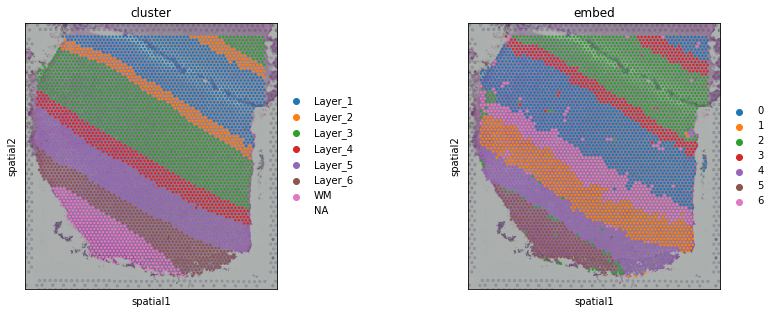

In [5]:
k_means_label = []
for item in k_means:
    k_means_label.append(str(item))
adata.obs['embed'] = k_means_label
sc.pl.spatial(adata, color=['cluster', 'embed'])

## 151508

In [6]:
section_list = ['151507', '151508', '151509', '151510', '151669', '151670', '151671', '151672', '151673', '151674', '151675', '151676']
section_id = section_list[1]

# 读取section_id这个slice的数据
adata = sc.read_visium(path=os.path.join('..', 'dataset', 'DLPFC', section_id))
adata.var_names_make_unique()

Ann_df = pd.read_csv(os.path.join('..', 'dataset', 'DLPFC', section_id, 'ground_truth.txt'), sep='\t', header=None, index_col=0)
Ann_df.columns = ['Ground Truth']
adata.obs['cluster'] = Ann_df.loc[adata.obs_names, 'Ground Truth']

in_features = 3000
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=in_features)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
label = LabelEncoder().fit_transform(adata.obs['cluster'])

/home/ubuntu/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
embed = train(adata, 800, label=label, epochs=100)

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
100%|██████████| 100/100 [01:46<00:00,  1.07s/it]


In [8]:
k_means = KMeans(n_clusters=7).fit(embed.detach().numpy()).predict(embed.detach().numpy())
label = LabelEncoder().fit_transform(adata.obs['cluster'])
pred = LabelEncoder().fit_transform(k_means)
print('pred:', metrics.adjusted_rand_score(label, pred))

pred: 0.7238461814967405


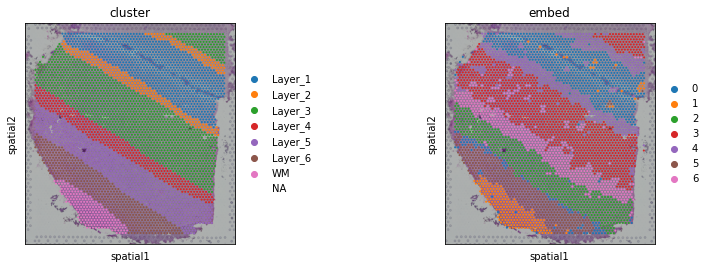

In [9]:
k_means_label = []
for item in k_means:
    k_means_label.append(str(item))
adata.obs['embed'] = k_means_label
sc.pl.spatial(adata, color=['cluster', 'embed'])

## 151670

In [10]:
section_list = ['151507', '151508', '151509', '151510', '151669', '151670', '151671', '151672', '151673', '151674', '151675', '151676']
section_id = section_list[5]

# 读取section_id这个slice的数据
adata = sc.read_visium(path=os.path.join('..', 'dataset', 'DLPFC', section_id))
adata.var_names_make_unique()

Ann_df = pd.read_csv(os.path.join('..', 'dataset', 'DLPFC', section_id, 'ground_truth.txt'), sep='\t', header=None, index_col=0)
Ann_df.columns = ['Ground Truth']
adata.obs['cluster'] = Ann_df.loc[adata.obs_names, 'Ground Truth']

in_features = 3000
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=in_features)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
label = LabelEncoder().fit_transform(adata.obs['cluster'])

/home/ubuntu/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
100%|██████████| 100/100 [01:12<00:00,  1.37it/s]


pred: 0.8938162602012836


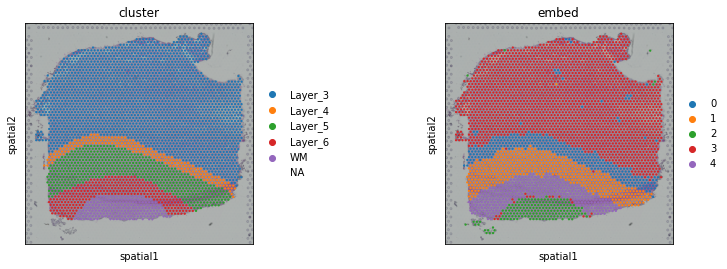

In [11]:
embed = train(adata, 800, label=label, epochs=100)

k_means = KMeans(n_clusters=5).fit(embed.detach().numpy()).predict(embed.detach().numpy())
label = LabelEncoder().fit_transform(adata.obs['cluster'])
pred = LabelEncoder().fit_transform(k_means)
print('pred:', metrics.adjusted_rand_score(label, pred))

k_means_label = []
for item in k_means:
    k_means_label.append(str(item))
adata.obs['embed'] = k_means_label
sc.pl.spatial(adata, color=['cluster', 'embed'])

## 151675

In [12]:
section_list = ['151507', '151508', '151509', '151510', '151669', '151670', '151671', '151672', '151673', '151674', '151675', '151676']
section_id = section_list[-2]

# 读取section_id这个slice的数据
adata = sc.read_visium(path=os.path.join('..', 'dataset', 'DLPFC', section_id))
adata.var_names_make_unique()

Ann_df = pd.read_csv(os.path.join('..', 'dataset', 'DLPFC', section_id, 'ground_truth.txt'), sep='\t', header=None, index_col=0)
Ann_df.columns = ['Ground Truth']
adata.obs['cluster'] = Ann_df.loc[adata.obs_names, 'Ground Truth']

in_features = 3000
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=in_features)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
label = LabelEncoder().fit_transform(adata.obs['cluster'])

/home/ubuntu/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
100%|██████████| 100/100 [01:14<00:00,  1.34it/s]


pred: 0.7997709031562072


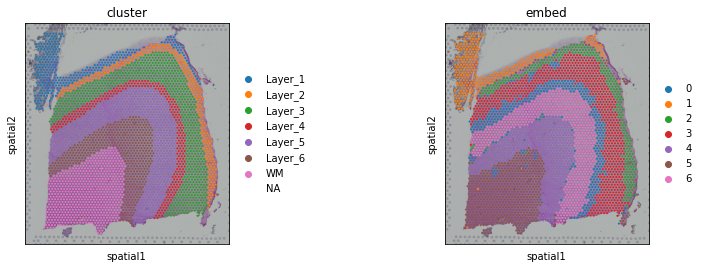

In [13]:
embed = train(adata, 800, label=label, epochs=100)

k_means = KMeans(n_clusters=7).fit(embed.detach().numpy()).predict(embed.detach().numpy())
label = LabelEncoder().fit_transform(adata.obs['cluster'])
pred = LabelEncoder().fit_transform(k_means)
print('pred:', metrics.adjusted_rand_score(label, pred))

k_means_label = []
for item in k_means:
    k_means_label.append(str(item))
adata.obs['embed'] = k_means_label
sc.pl.spatial(adata, color=['cluster', 'embed'])

In [ ]:
import squidpy as sq

adata = sq.datasets.merfish(path=os.path.join('..', 'dataset', 'merfish3d.h5ad'))
adata = adata[adata.obs['Bregma'] == -28.999999999999996]
print(adata)

# adata = sq.datasets.sc_mouse_cortex(path=os.path.join('..', 'dataset', 'sc_mouse_cortex.h5ad'))

in_features = 3000
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=in_features)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
label = LabelEncoder().fit_transform(adata.obs['Cell_class'])

In [ ]:
embed = train(adata, 161, label=label, epochs=100)

k_means = KMeans(n_clusters=16).fit(embed.detach().numpy()).predict(embed.detach().numpy())
label = LabelEncoder().fit_transform(adata.obs['Cell_class'])
pred = LabelEncoder().fit_transform(k_means)
print('pred:', metrics.adjusted_rand_score(label, pred))

k_means_label = []
for item in k_means:
    k_means_label.append(str(item))
adata.obs['embed'] = k_means_label
sc.pl.spatial(adata, color=['Cell_class', 'embed'], spot_size=1e-2)